# Import Libraries

In [0]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# Import Data

In [4]:
import h5py
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/A_Q3/SVHN_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


# Plot Images

In [0]:
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    """ Helper function for plotting nrows * ncols images
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    for i, ax in enumerate(axes.flat): 
        # Pretty string with actual label
        true_number = ''.join(str(x) for x in cls_true[i] if x != 10)
        if cls_pred is None:
            title = "Label: {0}".format(true_number)
        else:
            # Pretty string with predicted label
            pred_number = ''.join(str(x) for x in cls_pred[i] if x != 10)
            title = "Label: {0}, Pred: {1}".format(true_number, pred_number)  
            
        if images[i].shape == (32, 32, 3):
            print(1)
            ax.imshow(images[i])
        else:
            ax.imshow(images[:,:,:,i], cmap="gray")
#             ax.imshow(images[i])
        ax.set_title(title)   
        ax.set_xticks([]); ax.set_yticks([])

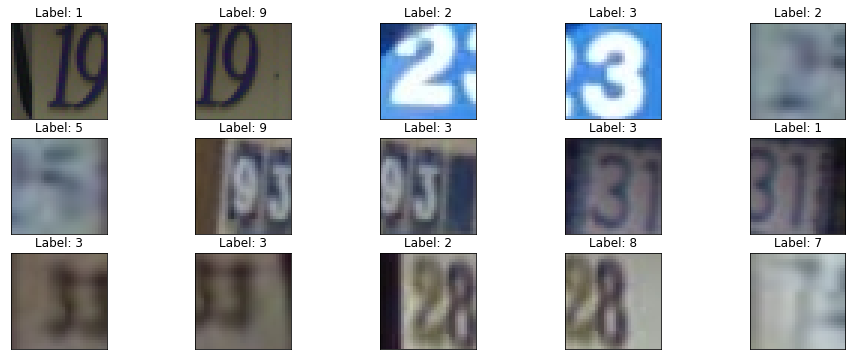

In [0]:
# Display images from the training set
plot_images(train_data, 3, 5, train_labels)

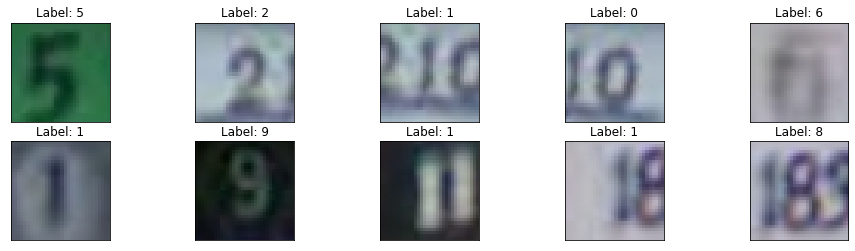

In [0]:
# Display images from the training set
plot_images(test_data, 2, 5, test_labels)

In [0]:
input_shape = (32,32,1)
nClasses = 10

# Model

-*# of Conv2D layers* ---> 6              
-*# of MaxPooling2D*  ---> 3     
-*# of Dropouts*      ---> 3(25%)+1(50%)  
-*filter size*        ---> (5,5)   
-*Acrivation*         ---> 'relu'   
-*total Parameters*   ---> 915,050

In [0]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 5x5
    model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [0]:
model2 = createModel()
batch_size = 1024
epochs = 100
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [0]:
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Train

*Maximum Accuracy* ---->      93.34%    
*Maximum Validation Acc* ---> 94.82%    
*Test Accuracy* ---->         94.82% 

In [0]:
history = model2.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
# history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
#                    validation_data=(test_data, test_labels_one_hot))
model2.evaluate(X_test, y_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
63/63 [==============================] - 31s 499ms/step - loss: 2.8392 - accuracy: 0.1790 - val_loss: 2.2030 - val_accuracy: 0.1959
Epoch 2/100
63/63 [==============================] - 31s 490ms/step - loss: 2.2162 - accuracy: 0.1949 - val_loss: 1.9384 - val_accuracy: 0.3291
Epoch 3/100
63/63 [==============================] - 31s 498ms/step - loss: 1.7224 - accuracy: 0.4058 - val_loss: 1.0082 - val_accuracy: 0.6841
Epoch 4/100
63/63 [==============================] - 31s 496ms/step - loss: 1.1443 - accuracy: 0.6253 - val_loss: 0.6145 - val_accuracy: 0.8165
Epoch 5/100
63/63 [==============================] - 31s 490ms/step - loss: 0.8558 - accuracy: 0.7279 - val_loss: 0.5003 - val_accuracy: 0.8519
Epoch 6/100
63/63 [==============================] - 31s 490ms/step - loss: 0.6975 - accuracy: 0.7832 - val_loss: 0.4017 - val_accuracy: 0.8790
Epoch 7/100
63/63 [==============================] - 31s 492

[0.19078253209590912, 0.9482175707817078]

In [0]:
y_test_pred = model2.predict(X_test).argmax(axis=1)
y_test_pred

array([5, 2, 1, ..., 7, 6, 7])

# **Curves**

Text(0.5, 1.0, 'Loss Curves')

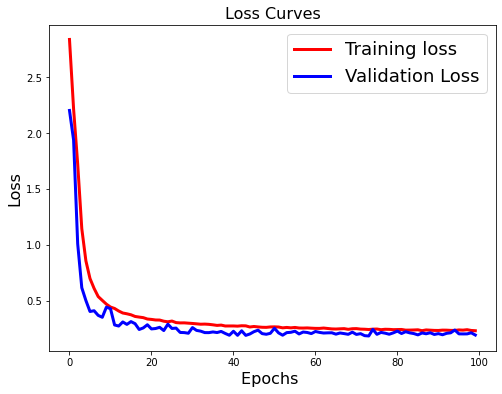

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

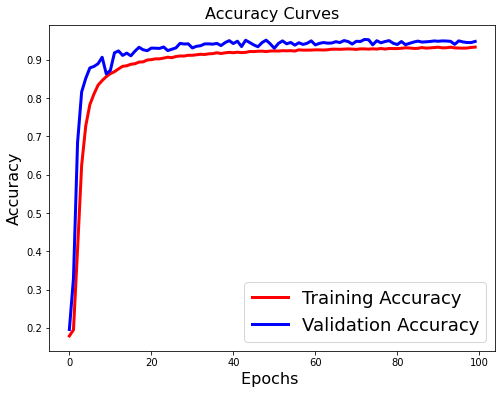

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
y_test[0][:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [0]:
y_test1 = np.zeros_like(y_test_pred, dtype=np.float64)
y_test1.shape

(26032,)

In [0]:
print(y_test.dtype)
y_test.astype(np.float64)

float64


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [0]:
i=0
for arr in y_test[:]:
  y_test1[i] = list(arr).index(1)
  i+=1
print(y_test1)

[5. 2. 1. ... 7. 6. 7.]


In [0]:
labels = np.arange(10)
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# **Confusion matrix**

Normalized confusion matrix


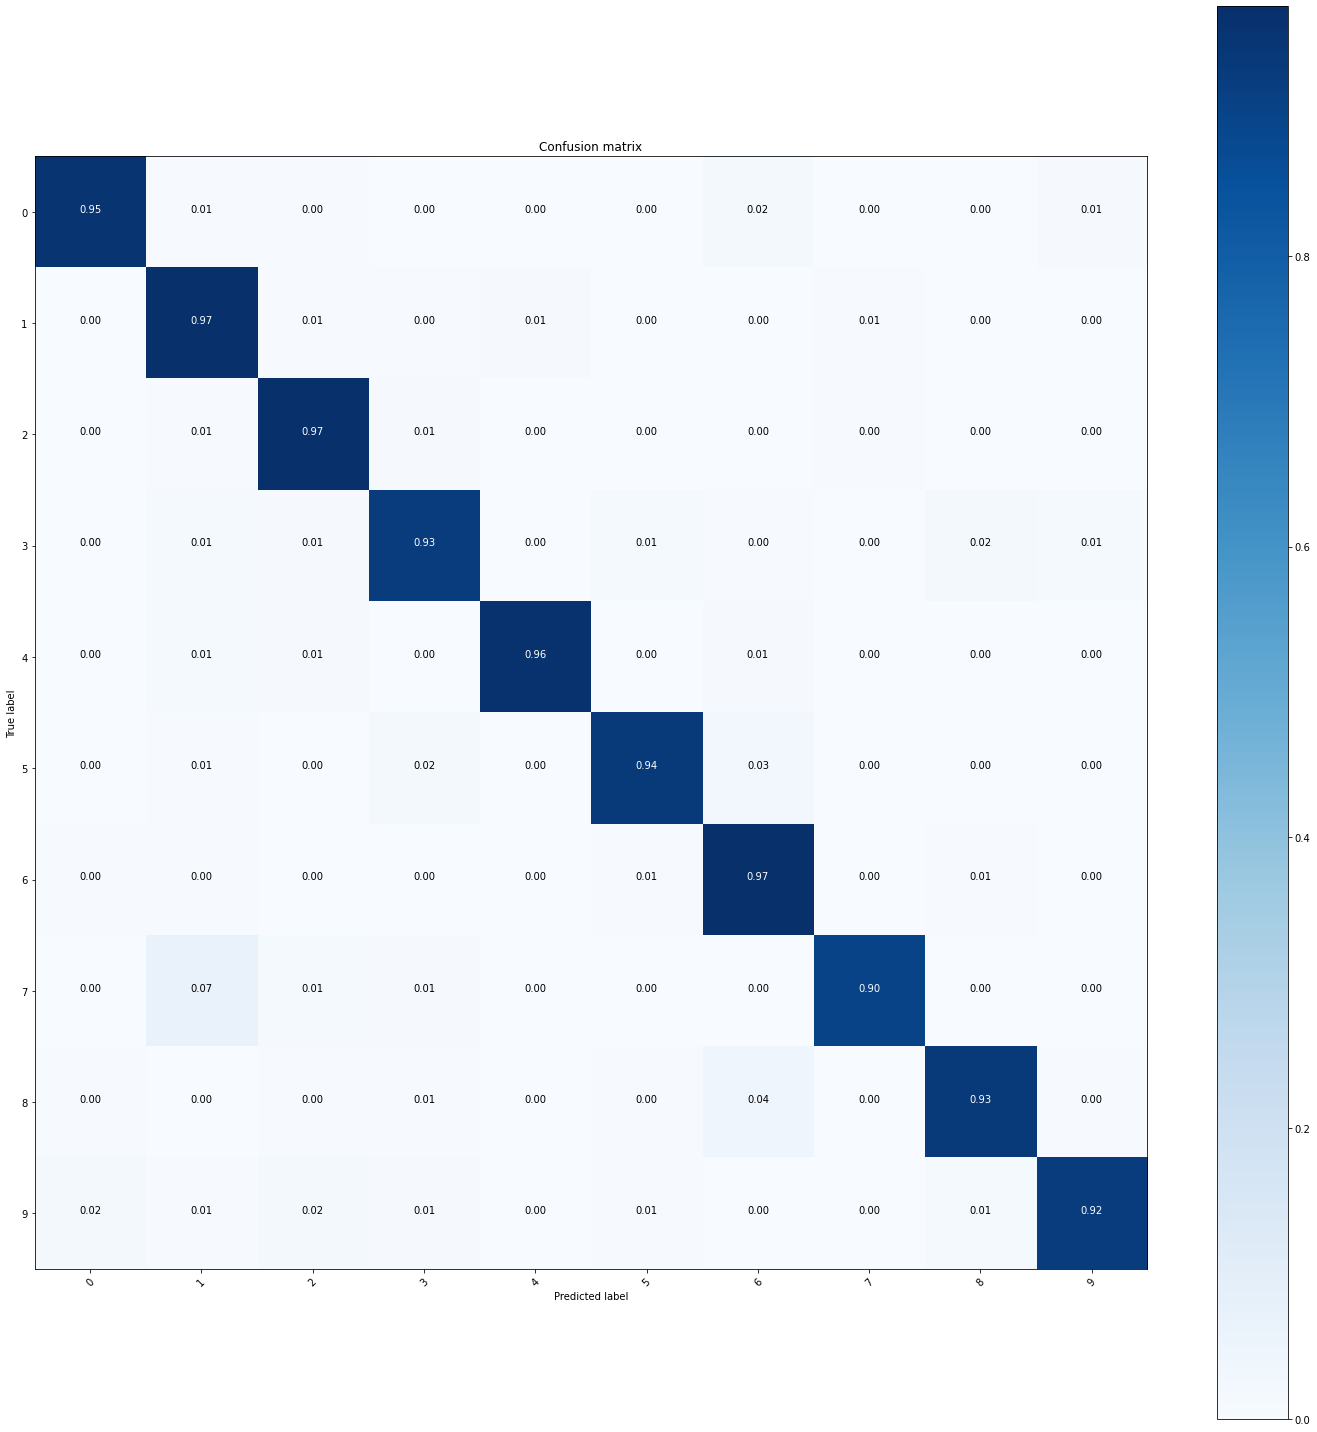

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cm = confusion_matrix(y_test1, y_test_pred)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plot_confusion_matrix(cm, classes, normalize=True)

# **Save model**

In [0]:
model2.save('/content/drive/My Drive/Colab Notebooks/A_Q3/model2.h5')

# Show Feature Map for sample in training data

In [0]:
from tensorflow.keras.models import load_model
model2 = load_model('/content/drive/My Drive/Colab Notebooks/A_Q3/model2.h5')

(32, 32, 1)


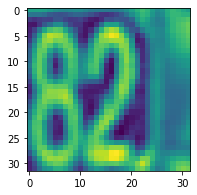

In [7]:
test_im = X_train[154]
print(test_im.shape)

test = test_im.reshape(32,32)
plt.rcParams['figure.figsize'] = (3.0, 3.0)
plt.imshow(test, cmap='viridis', interpolation='none')

In [9]:
model2.input

<tf.Tensor 'conv2d_18_input:0' shape=(None, 32, 32, 1) dtype=float32>

In [10]:
model2.layers[:-1]# Droping The Last Dense Layer

In [11]:
# visualize feature maps output from each block in the model
from keras.preprocessing.image import img_to_array
from tensorflow.compat.v1.keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims

Using TensorFlow backend.


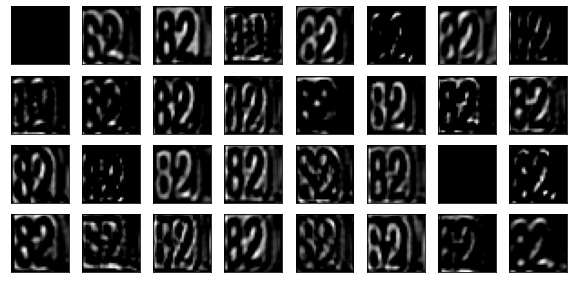

OutPut Current Layer


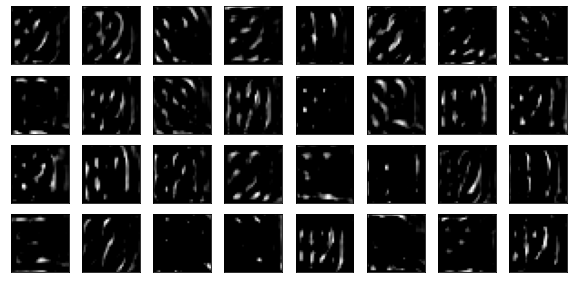

OutPut Current Layer


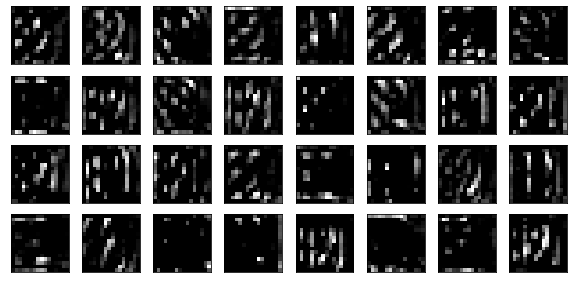

OutPut Current Layer


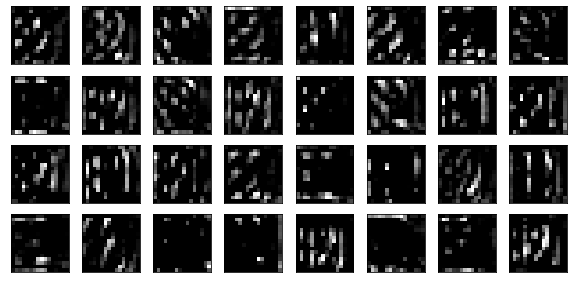

OutPut Current Layer


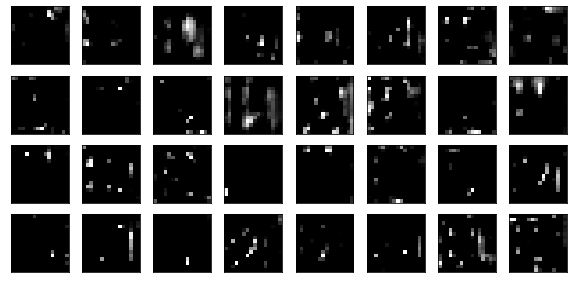

OutPut Current Layer


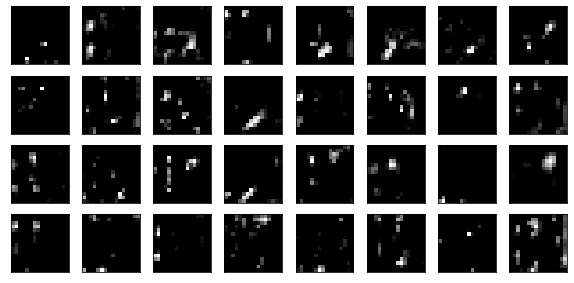

OutPut Current Layer


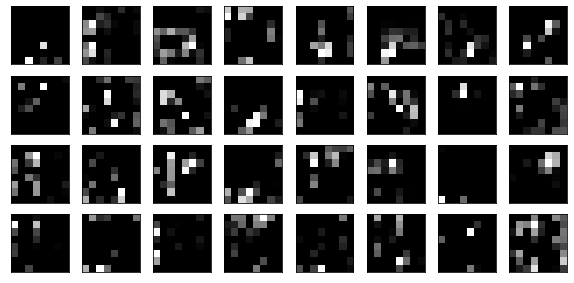

OutPut Current Layer


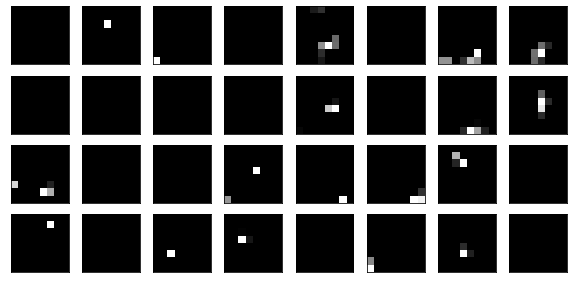

OutPut Current Layer


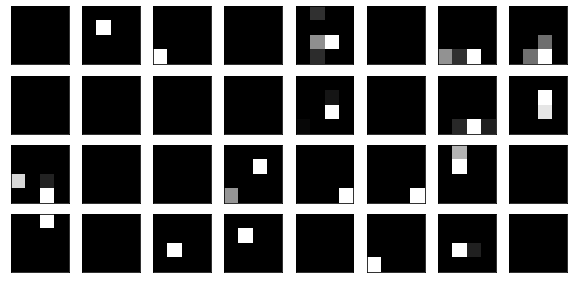

OutPut Current Layer


In [14]:
# redefine model to output right after the first hidden layer
ixs = [0, 1, 2, 3, 4, 5, 6, 9, 10]
outputs = [model2.layers[i].output for i in ixs]
model = Model(inputs=model2.inputs, outputs=outputs)

# convert the test image to an array
img = img_to_array(test_im)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot the output from each block
plt.rcParams['figure.figsize'] = (10.0, 10.0)
for fmap in feature_maps:
	# plot all 32 maps in an 4x8 squares
	ix = 1
	for _ in range(4):
		for _ in range(8):
			# specify subplot and turn of axis
			ax = plt.subplot(8, 8, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	plt.show()
	print('OutPut Current Layer')